In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
import experiments
import pandas as pd

curves = 9
curve_labels = ['k=1/4 1/4x', 'k=1/4 1x', 'k=1/4 4x', 'k=1 1/4x',
                'k=1 1x', 'k=1 4x', 'k=4 1/4x', 'k=4 1x', 'k=4 4x']
curve_colors = ['lightblue', 'blue', 'darkblue', 'lightgreen', 'limegreen', 'darkgreen', 'peachpuff', 'orange', 'darkorange']
curve_styles = ['-', '-', '-', '-', '-', '-', '-', '-', '-']
range_len = 7
levels = np.linspace(0.0, 1.0, num=range_len).tolist()
knockout_range = np.linspace(0.0, 1.0, num=range_len)
noise_range = np.linspace(0.0, 1.0, num=range_len)
level_labels = [str(levels[i] for i in range(range_len))]
crosses = 3

rand_ablation_results = np.zeros((curves, range_len, 3))
noise_results = np.zeros((curves, range_len, 3))
targeted_ablation_results = np.zeros((curves, range_len, 3))
rand_ablation_results_test = np.zeros((curves, range_len, 3))
noise_results_test = np.zeros((curves, range_len, 3))
targeted_ablation_results_test = np.zeros((curves, range_len, 3))
# all are indexed [curve][perturbation_level][avg/lowererr/uppererr]
# note that this will only be for the TEST set

included_nets = [217, 219, 223, 225, 229, 231, 234, 236, 238]

for ID in included_nets:

    print('Processing ID:', ID)
    opt = experiments.opt[ID]

    curve_idx = 0  # unregularized
    if opt.hyper.lr_bs_factor == 1:
        curve_idx += 3
    if opt.hyper.lr_bs_factor == 4:
        curve_idx += 6
    if opt.dnn.neuron_multiplier[0] == 1:
        curve_idx += 1
    elif opt.dnn.neuron_multiplier[0] == 4:
        curve_idx += 2

    csv_file = experiments.opt[ID].csv_dir + experiments.opt[ID].name + '_robustness.csv'
    df = pd.read_csv(csv_file)

    rand_ablation = np.zeros((crosses, range_len))
    noise = np.zeros((crosses, range_len))
    targeted_ablation = np.zeros((crosses, range_len))
    rand_ablation_test = np.zeros((crosses, range_len))
    noise_test = np.zeros((crosses, range_len))
    targeted_ablation_test = np.zeros((crosses, range_len))

    for cross in range(crosses):
        for amount in range(range_len):
            rand_ablation[cross, amount] = df[df['cross_validation'] == cross] \
                [df['evaluation_set'] == 'train'][df['perturbation_layer'] == 'all'] \
                [df['perturbation_name'] == 'Activation Knockout'] \
                [df['perturbation_amount'] == knockout_range[amount]]['performance'].iloc[0]
            noise[cross, amount] = df[df['cross_validation'] == cross][df['evaluation_set'] == 'train'] \
                [df['perturbation_layer'] == 'all'][df['perturbation_name'] == 'Activation Noise'] \
                [df['perturbation_amount'] == noise_range[amount]] \
                ['performance'].iloc[0]
            targeted_ablation[cross, amount] = df[df['cross_validation'] == cross] \
                [df['evaluation_set'] == 'train'][df['perturbation_layer'] == 'all'] \
                [df['perturbation_name'] == 'Activation Knockout Selected'] \
                [df['perturbation_amount'] == knockout_range[amount]]['performance'].iloc[0]
            rand_ablation_test[cross, amount] = df[df['cross_validation'] == cross] \
                [df['evaluation_set'] == 'test'][df['perturbation_layer'] == 'all'] \
                [df['perturbation_name'] == 'Activation Knockout'] \
                [df['perturbation_amount'] == knockout_range[amount]]['performance'].iloc[0]
            noise_test[cross, amount] = df[df['cross_validation'] == cross][df['evaluation_set'] == 'test'] \
                [df['perturbation_layer'] == 'all'][df['perturbation_name'] == 'Activation Noise'] \
                [df['perturbation_amount'] == noise_range[amount]] \
                ['performance'].iloc[0]
            targeted_ablation_test[cross, amount] = df[df['cross_validation'] == cross] \
                [df['evaluation_set'] == 'test'][df['perturbation_layer'] == 'all'] \
                [df['perturbation_name'] == 'Activation Knockout Selected'] \
                [df['perturbation_amount'] == knockout_range[amount]]['performance'].iloc[0]

    rand_ablation_results[curve_idx, :, 0] = np.mean(rand_ablation, axis=0)
    rand_ablation_results[curve_idx, :, 1] = rand_ablation_results[curve_idx, :, 0] - np.min(rand_ablation, axis=0)
    rand_ablation_results[curve_idx, :, 2] = np.max(rand_ablation, axis=0) - rand_ablation_results[curve_idx, :, 0]
    noise_results[curve_idx, :, 0] = np.mean(noise, axis=0)
    noise_results[curve_idx, :, 1] = noise_results[curve_idx, :, 0] - np.min(noise, axis=0)
    noise_results[curve_idx, :, 2] = np.max(noise, axis=0) - noise_results[curve_idx, :, 0]
    targeted_ablation_results[curve_idx, :, 0] = np.mean(targeted_ablation, axis=0)
    targeted_ablation_results[curve_idx, :, 1] = targeted_ablation_results[curve_idx, :, 0] - np.min(targeted_ablation, axis=0)
    targeted_ablation_results[curve_idx, :, 2] = np.max(targeted_ablation, axis=0) - targeted_ablation_results[curve_idx, :, 0]
    
    rand_ablation_results_test[curve_idx, :, 0] = np.mean(rand_ablation_test, axis=0)
    rand_ablation_results_test[curve_idx, :, 1] = rand_ablation_results_test[curve_idx, :, 0] - np.min(rand_ablation_test, axis=0)
    rand_ablation_results_test[curve_idx, :, 2] = np.max(rand_ablation_test, axis=0) - rand_ablation_results_test[curve_idx, :, 0]
    noise_results_test[curve_idx, :, 0] = np.mean(noise_test, axis=0)
    noise_results_test[curve_idx, :, 1] = noise_results_test[curve_idx, :, 0] - np.min(noise_test, axis=0)
    noise_results_test[curve_idx, :, 2] = np.max(noise_test, axis=0) - noise_results_test[curve_idx, :, 0]
    targeted_ablation_results_test[curve_idx, :, 0] = np.mean(targeted_ablation_test, axis=0)
    targeted_ablation_results_test[curve_idx, :, 1] = targeted_ablation_results_test[curve_idx, :, 0] - np.min(targeted_ablation_test, axis=0)
    targeted_ablation_results_test[curve_idx, :, 2] = np.max(targeted_ablation_test, axis=0) - targeted_ablation_results_test[curve_idx, :, 0]
    
rand_ablation_results *= 100
noise_results *= 100
targeted_ablation_results *= 100
rand_ablation_results_test *= 100
noise_results_test *= 100
targeted_ablation_results_test *= 100

Processing ID: 217
Processing ID: 219
Processing ID: 223
Processing ID: 225
Processing ID: 229
Processing ID: 231
Processing ID: 234
Processing ID: 236
Processing ID: 238


/cm/shared/openmind/anaconda/2.5.0/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


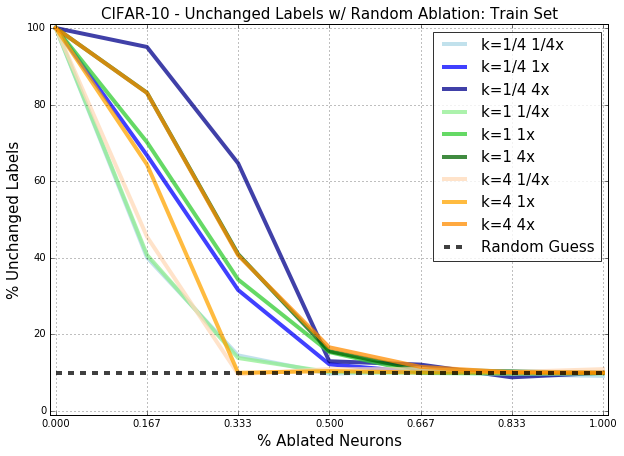

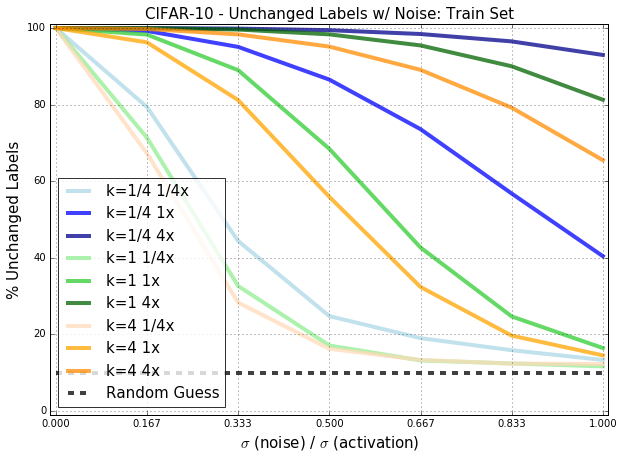

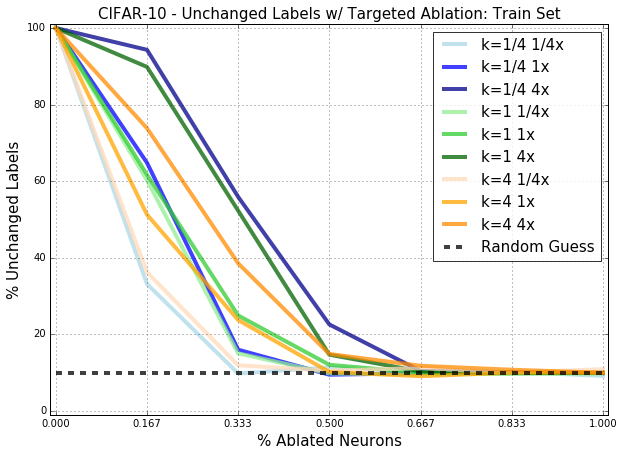

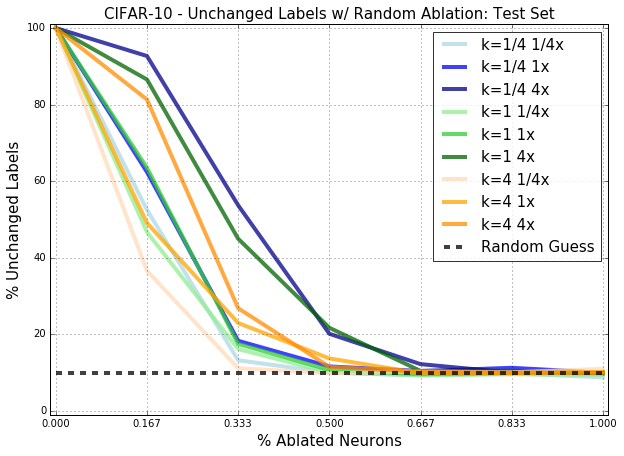

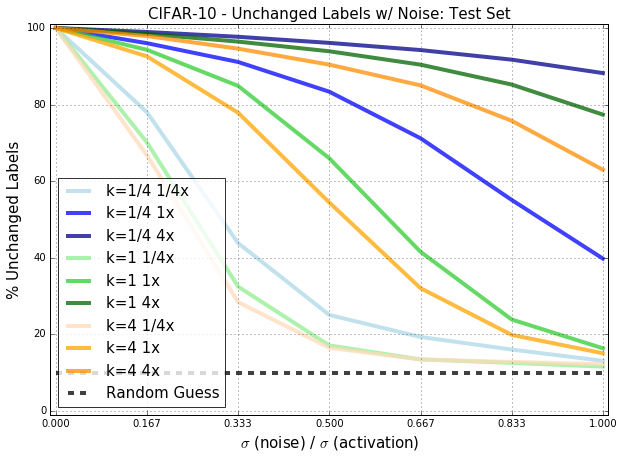

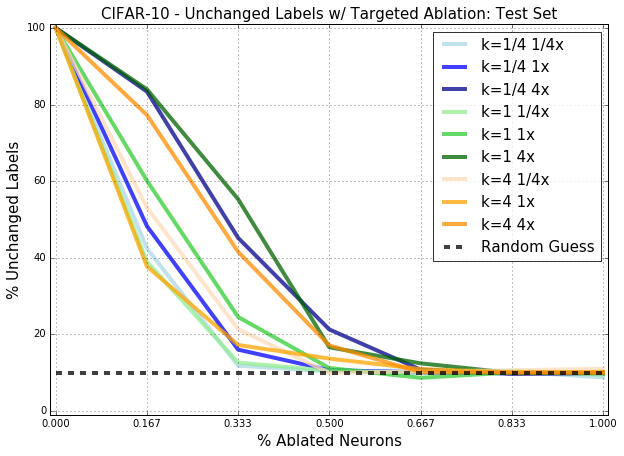

In [2]:
# first plot rand ablation train curves

% matplotlib inline
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Unchanged Labels w/ Random Ablation: Train Set', fontsize=15)
plt.xlabel('% Ablated Neurons', fontsize=15)
plt.ylabel('% Unchanged Labels', fontsize=15)
plt.xlim((-0.01, 1.01))
plt.ylim((-1, 101))
plt.grid(True, which='both', c='black')
plt.xticks(levels)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=10)

for curve_idx in range(curves):
    plt.plot(levels, rand_ablation_results[curve_idx, :, 0], color=curve_colors[curve_idx],
             linestyle=curve_styles[curve_idx], linewidth=4, alpha=0.75)
plt.plot(levels, [10 for i in range(len(levels))], color='black', linestyle='--', linewidth=4, alpha=0.75)
plt.legend(curve_labels + ['Random Guess'], loc='upper right', framealpha=0.8, fontsize=15)

plt.show()

# second plot noise train curves

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Unchanged Labels w/ Noise: Train Set', fontsize=15)
plt.xlabel('$\sigma$ (noise) / $\sigma$ (activation)', fontsize=15)
plt.ylabel('% Unchanged Labels', fontsize=15)
plt.xlim((-0.01, 1.01))
plt.ylim((-1, 101))
plt.grid(True, which='both', c='black')
plt.xticks(levels)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=10)

for curve_idx in range(curves):
    plt.plot(levels, noise_results[curve_idx, :, 0], color=curve_colors[curve_idx],
             linestyle=curve_styles[curve_idx], linewidth=4, alpha=0.75)
plt.plot(levels, [10 for i in range(len(levels))], color='black', linestyle='--', linewidth=4, alpha=0.75)
plt.legend(curve_labels + ['Random Guess'], loc='lower left', framealpha=0.8, fontsize=15)

plt.show()

# third plot the targeted ablation train curves

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Unchanged Labels w/ Targeted Ablation: Train Set', fontsize=15)
plt.xlabel('% Ablated Neurons', fontsize=15)
plt.ylabel('% Unchanged Labels', fontsize=15)
plt.xlim((-0.01, 1.01))
plt.ylim((-1, 101))
plt.grid(True, which='both', c='black')
plt.xticks(levels)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=10)

for curve_idx in range(curves):
    plt.plot(levels, targeted_ablation_results[curve_idx, :, 0], color=curve_colors[curve_idx],
             linestyle=curve_styles[curve_idx], linewidth=4, alpha=0.75)
plt.plot(levels, [10 for i in range(len(levels))], color='black', linestyle='--', linewidth=4, alpha=0.75)
plt.legend(curve_labels + ['Random Guess'], loc='upper right', framealpha=0.8, fontsize=15)

plt.show()

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Unchanged Labels w/ Random Ablation: Test Set', fontsize=15)
plt.xlabel('% Ablated Neurons', fontsize=15)
plt.ylabel('% Unchanged Labels', fontsize=15)
plt.xlim((-0.01, 1.01))
plt.ylim((-1, 101))
plt.grid(True, which='both', c='black')
plt.xticks(levels)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=10)

for curve_idx in range(curves):
    plt.plot(levels, rand_ablation_results_test[curve_idx, :, 0], color=curve_colors[curve_idx],
             linestyle=curve_styles[curve_idx], linewidth=4, alpha=0.75)
plt.plot(levels, [10 for i in range(len(levels))], color='black', linestyle='--', linewidth=4, alpha=0.75)
plt.legend(curve_labels + ['Random Guess'], loc='upper right', framealpha=0.8, fontsize=15)

plt.show()

# second plot noise train curves

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Unchanged Labels w/ Noise: Test Set', fontsize=15)
plt.xlabel('$\sigma$ (noise) / $\sigma$ (activation)', fontsize=15)
plt.ylabel('% Unchanged Labels', fontsize=15)
plt.xlim((-0.01, 1.01))
plt.ylim((-1, 101))
plt.grid(True, which='both', c='black')
plt.xticks(levels)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=10)

for curve_idx in range(curves):
    plt.plot(levels, noise_results_test[curve_idx, :, 0], color=curve_colors[curve_idx],
             linestyle=curve_styles[curve_idx], linewidth=4, alpha=0.75)
plt.plot(levels, [10 for i in range(len(levels))], color='black', linestyle='--', linewidth=4, alpha=0.75)
plt.legend(curve_labels + ['Random Guess'], loc='lower left', framealpha=0.8, fontsize=15)

plt.show()

# third plot the targeted ablation train curves

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Unchanged Labels w/ Targeted Ablation: Test Set', fontsize=15)
plt.xlabel('% Ablated Neurons', fontsize=15)
plt.ylabel('% Unchanged Labels', fontsize=15)
plt.xlim((-0.01, 1.01))
plt.ylim((-1, 101))
plt.grid(True, which='both', c='black')
plt.xticks(levels)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=10)

for curve_idx in range(curves):
    plt.plot(levels, targeted_ablation_results_test[curve_idx, :, 0], color=curve_colors[curve_idx],
             linestyle=curve_styles[curve_idx], linewidth=4, alpha=0.75)
plt.plot(levels, [10 for i in range(len(levels))], color='black', linestyle='--', linewidth=4, alpha=0.75)
plt.legend(curve_labels + ['Random Guess'], loc='upper right', framealpha=0.8, fontsize=15)

plt.show()